In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

## Upper Confidence Bound 

In [46]:
import math
N = 10000
d = 10
ads_selected = []
number_of_selection = [0] * d
sum_of_rewards = [0] * d
total_reward = 0

for n in range(N):               #loop for no of rounds of trials
    ad = 0
    max_upper_bound = 0
    for i in range(1, d):            #loop to view result of each individual machines
        
        if(number_of_selection[i] > 0):                                                    #just to make sure every machines are explored once before exploitation
            average_reward = sum_of_rewards[i] / number_of_selection[i]                    #maths for exploitation
            delta_i = math.sqrt(3/2 * math.log(n+1) / number_of_selection[i])              #maths for exploration
            upper_bound = average_reward + delta_i                                         #balancing exploration and exploitation
            
        else:
            upper_bound = 1e400                #making upper bound of a machine infinity so that machine gets selected
        
        if(upper_bound > max_upper_bound):                        #for selecting best machine after each round
            max_upper_bound = upper_bound
            ad = i
            
    ads_selected.append(ad)                                     #selecting machine and append its number to list 
    number_of_selection[ad] += 1                                #for record of how many times a machine is selected
    reward = dataset.values[n, ad]                              #selecting values from dataset because its already 1 for win and 0 for loss.
    sum_of_rewards[ad] += reward                                #for record how many time any machine recived reward.
    total_reward += reward
    
            
            

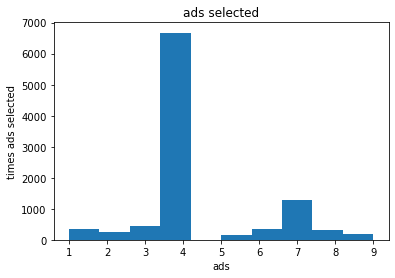

In [47]:
plt.hist(ads_selected, histtype = "bar", align = "mid")
plt.title("ads selected")
plt.xlabel("ads")
plt.ylabel("times ads selected")
plt.show()

## Thompson Sampling 

In [58]:
import random

N = 10000
d = 10
ads_selected = []
number_of_reward_1 = [0] * d
number_of_reward_0 = [0] * d
total_rewards = 0

for n in range(N):
    ad = 0
    max_random = 0
    
    for i in range(d):
        random_beta = random.betavariate(number_of_reward_1[i] + 1, number_of_reward_0[i] + 1)
        
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
            
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if (reward == 1):
        number_of_reward_1[ad] += 1
        
    else:
        number_of_reward_0[ad] += 1
        
    total_reward += reward

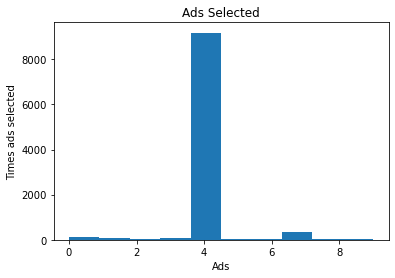

In [59]:
plt.hist(ads_selected)
plt.title("Ads Selected")
plt.xlabel("Ads")
plt.ylabel("Times ads selected")
plt.show()